![](img/list.jpg)

# Sumário

[1. Regressão Linear ](#reg_linear)

[2. Regressão Polinomial](#reg_poli)

[3. Regressão de Poisson](#reg_poisson)

## 1. Regressão Linear  <a name="reg_linear"><a>
    
* [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Segundo o [Teorema de Gauss-Markov](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) um modelo de regressão linear, o estimador de mínimos quadrados ordinários) fornece o melhor estimador imparcial linear dos coeficientes, desde que:

* a esperânça dos erros (resíduos) é 0
* os erros não estão correlacionados
* os erros têm variância igual - homocedasticidade dos erros

Este exemplo usa o único recurso do conjunto de dados de diabetes, para ilustrar um gráfico bidimensional dessa técnica de regressão. A linha reta pode ser vista no gráfico, mostrando como a regressão linear tenta desenhar uma linha reta que minimize melhor a soma residual dos quadrados entre as respostas observadas no conjunto de dados e as respostas previstas pela aproximação linear.

Os coeficientes, a soma dos residuos ao quadrado e o score de variância também são calculados.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coeficiente de angular: 938.24
Erro quadrático médio: 2548.07
R²: 0.47


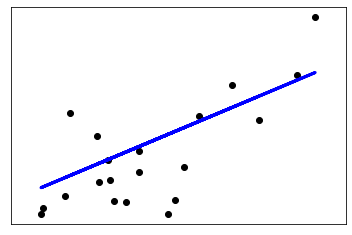

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coeficiente de angular: %.2f' % regr.coef_[0])
# The mean squared error
print("Erro quadrático médio: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('R²: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(()) 
plt.yticks(())

plt.show()

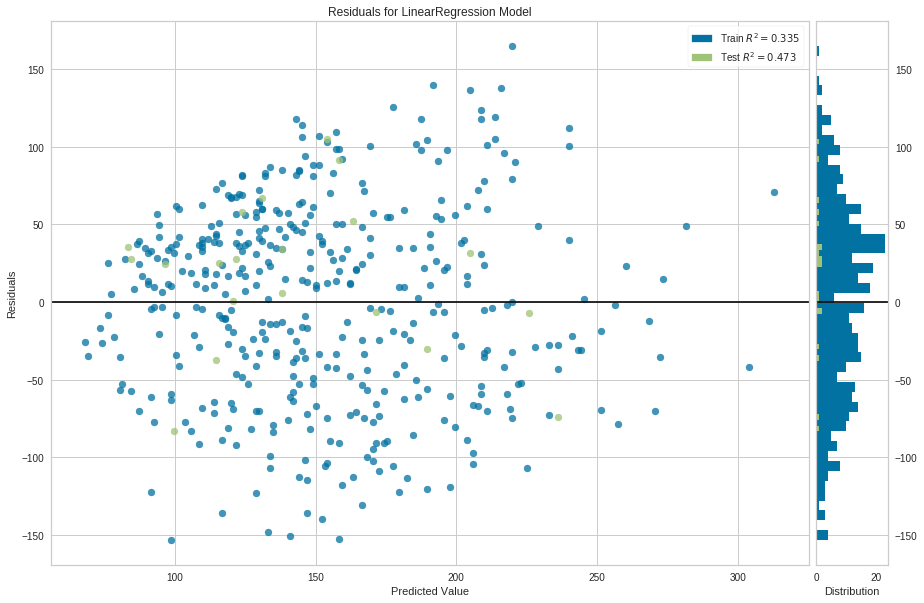

In [51]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regr, size=(1080, 720))

visualizer.fit(diabetes_X_train, diabetes_y_train)  # Fit the training data to the visualizer
visualizer.score(diabetes_X_test, diabetes_y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

### Usando Dataset Boston

In [48]:
import pandas as pd
from sklearn.datasets import load_boston

# load data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.drop('CHAS', axis=1, inplace=True)
y = pd.Series(boston.target, name='MEDV')

# inspect data
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coeficientes: {lin_reg.coef_}\n')
print(f'Intercépto: {lin_reg.intercept_}')
print(f'R² : {lin_reg.score(X, y)}')

Coeficientes: [-1.12227407e-01  4.70252171e-02  4.06441315e-02 -1.73969886e+01
  3.84517903e+00  2.84684840e-03 -1.48555729e+00  3.27895368e-01
 -1.37513229e-02 -9.91733111e-01  9.82674304e-03 -5.34914383e-01]

Intercépto: 36.925032623462045
R² : 0.7354743593558175


Por padrão, uma regressão linear na linguagem R traz muito mais detalhes sobre modelo gerado. Podemos usar R em nosso ambiente para nos benificiarmos dessa característica, para isso, precisamos executar alguns comandos "mágicos".

In [52]:
# fazendo o load da extensão R
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [60]:
# transformando nossos objetos python em obj R
%R -i X -i y

%R lin_reg <- lm(y ~ . , data = cbind(X, y))
%R summary(lin_reg)

R object with classes: ('summary.lm',) mapped to:
<ListVector - Python:0x7fa474ac84c8 / R:0x836aa08>
[Vector, Formula, FloatVector, Matrix, ..., FloatVector, FloatVector, FloatVector, Matrix]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('lm',) mapped to:
<Vector - Python:0x7fa474562888 / R:0x81fe718>
[RObject, Vector, Vector]
  terms: <class 'rpy2.robjects.Formula'>
  R object with classes: ('terms', 'formula') mapped to:
<Formula - Python:0x7fa4745d81c8 / R:0x82c93d0>
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fa474758088 / R:0x82fb370>
[-6.217171, -3.671971, 3.847566, 4.633851, ..., -1.979599, -4.028416, -4.406141, -10.663754]
  coefficients: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x7fa4745d4308 / R:0x8232020>
[36.925033, -0.112227, 0.047025, 0.040644, ..., 0.000289, 0.000000, 0.000307, 0.000000]
...
  sigma: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fa4745a8208 / R:0x8362770>
[0.735474]
  df: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fa4745d1188 / R:0x8362738>
[0.729036]
  r.squared: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7fa4745a8b08 / R:0x82de2d8>
[114.226123, 12.000000, 493.000000]
  adj.r.squared: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x7fa474613dc8 / R:0x836ced0>
[1.156108, -0.000483, -0.000074, 0.000742, ..., 0.000000, -0.000015, 0.000001, 0.000114]

In [62]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

ImportError: cannot import name 'factorial'

## 2 - Regressão Polinomial <a name="reg_poli"></a>

* [Polynomial Regression](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)

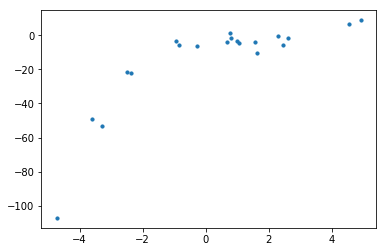

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

Primeiro vamos tentar resolver usando regressão linear e ver o resultado

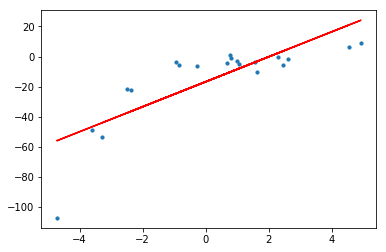

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [10]:
model.score(x, y) # R²

0.6386750054827147

In [14]:
mean_squared_error(y, y_pred)**(0.5) # RMSE

15.908242501429998

Temos então que 63% da variância dos dados foi explicada, com a raíz do erro quadrático médio de aproximadamente 16.

Vamos agora usar um modelo polinomial.

![](img/modelo_poli.png)

Esse modelo ainda é considerado linear, pois os coeficientes/pesos associados as observações ainda são lineares. x² é apenas um recurso. No entanto, a curva que estamos ajustando é de natureza quadrática.

RMSE: 10.12
R²: 0.85


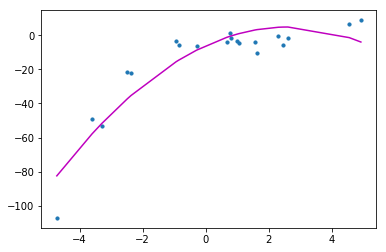

In [20]:
from sklearn.preprocessing import PolynomialFeatures
import operator


polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE: %.2f" %rmse)
print("R²: %.2f" %r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

## 3 - Regressão de Poisson <a name="reg_poisson"></a>

* [An Illustrated Guide to the Poisson Regression Model](https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958)